# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


Performance Summary for LogisticRegressor
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



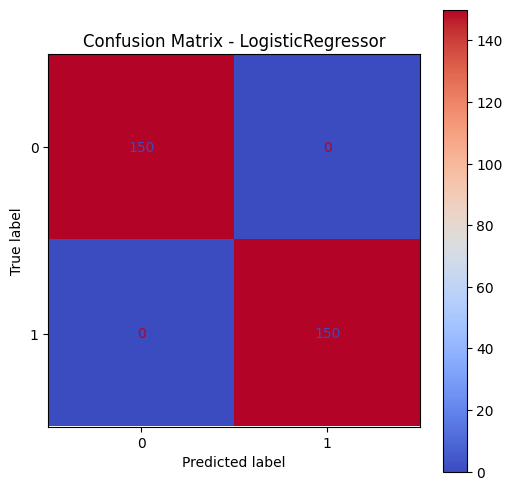

Performance Summary for SupportVectorClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



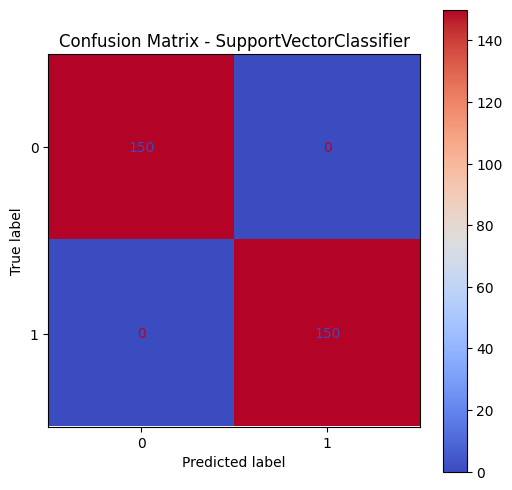

Performance Summary for KNearestNeighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



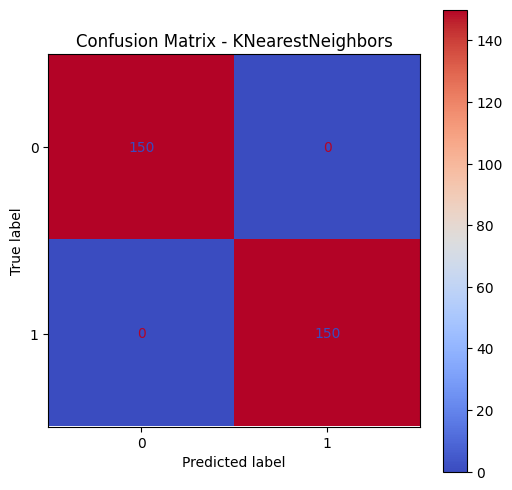

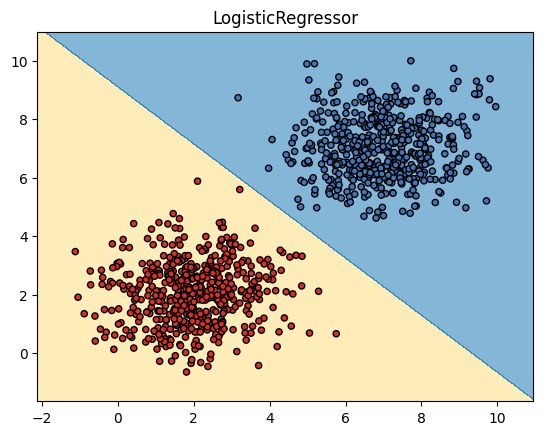

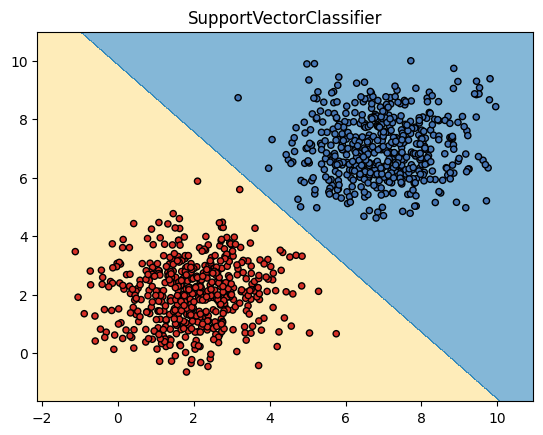

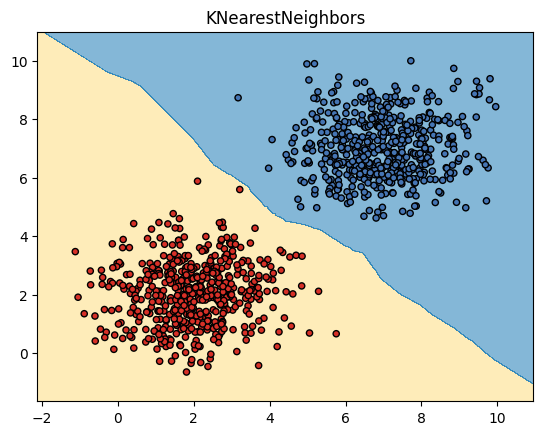

In [5]:
dataset = pd.read_csv('task_1.csv')

features = dataset[['x', 'y']].to_numpy()
classes = LabelEncoder().fit_transform(dataset['class'])

train_features, test_features, train_classes, test_classes = train_test_split(
    features, classes, test_size=0.3, random_state=42
)

model_suite = {
    'LogisticRegressor': LogisticRegression(),
    'SupportVectorClassifier': SVC(kernel='linear', probability=True),
    'KNearestNeighbors': KNeighborsClassifier(n_neighbors=5)
}

evaluation_results = {}

for model_identifier, model_instance in model_suite.items():
    model_instance.fit(train_features, train_classes)
    predictions = model_instance.predict(test_features)
    report = classification_report(test_classes, predictions, output_dict=True)
    evaluation_results[model_identifier] = report

    print(f"Performance Summary for {model_identifier}")
    print(classification_report(test_classes, predictions))

    matrix = confusion_matrix(test_classes, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=np.unique(classes))
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap="coolwarm", colorbar=True)
    plt.title(f"Confusion Matrix - {model_identifier}")
    plt.show()


def visualize_classification_boundary(estimator, data, labels, plot_title):
    color_map_background = ListedColormap(['#FEE08B', '#3288BD'])
    color_map_points = ['#D73027', '#4575B4']

    x_range_min, x_range_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_range_min, y_range_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    grid_x, grid_y = np.meshgrid(
        np.arange(x_range_min, x_range_max, 0.01),
        np.arange(y_range_min, y_range_max, 0.01)
    )

    predictions = estimator.predict(np.c_[grid_x.ravel(), grid_y.ravel()])
    predictions = predictions.reshape(grid_x.shape)

    plt.contourf(grid_x, grid_y, predictions, cmap=color_map_background, alpha=0.6)
    plt.scatter(
        data[:, 0], data[:, 1],
        c=labels,
        cmap=ListedColormap(color_map_points),
        edgecolor='black',
        s=20
    )
    plt.title(plot_title)
    plt.show()

for classifier_label, trained_model in model_suite.items():
    visualize_classification_boundary(trained_model, features, classes, classifier_label)


**Висновок результатів**:

1. За результатами всі моделі показали високу точність, тому що моделі можуть легко класифікувати дані і ці дані є лінійно роздільні



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


Performance Report for LogisticModel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



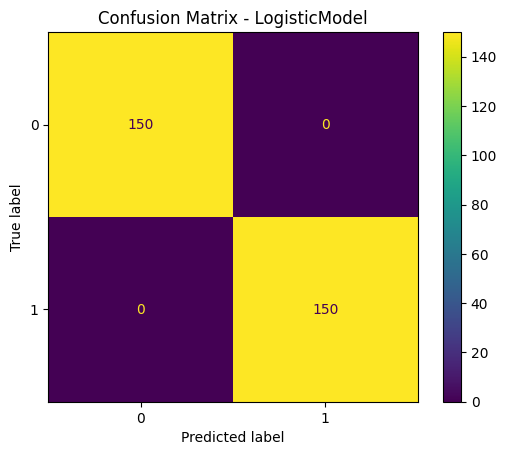

Performance Report for RadialSVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



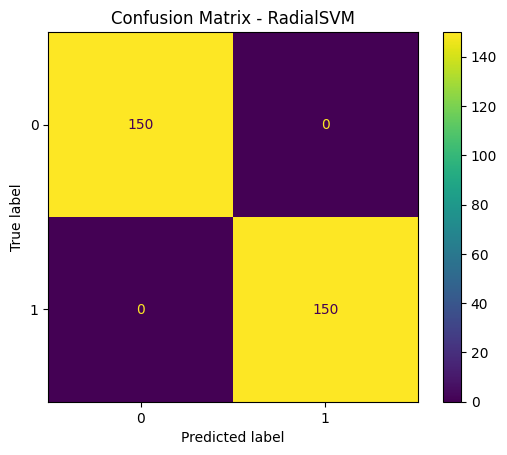

Performance Report for KNNClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



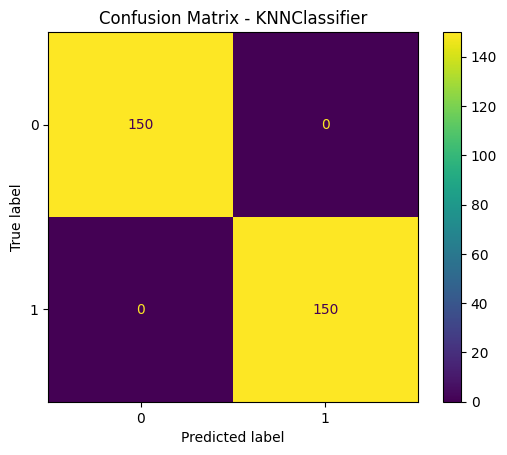

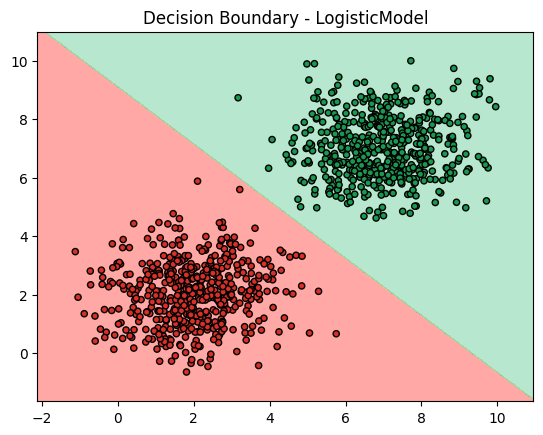

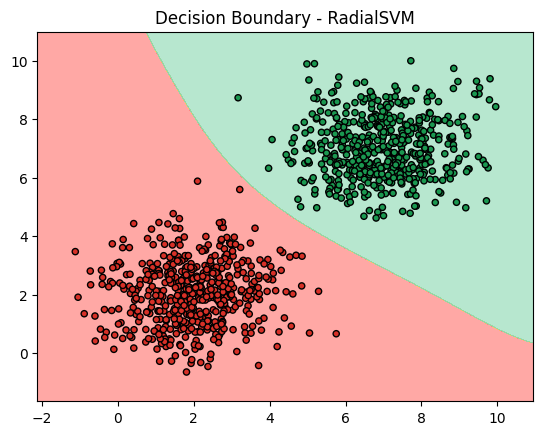

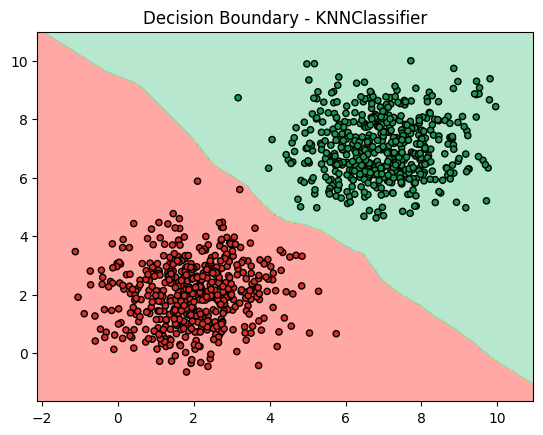

In [8]:
class MultiClassifier:
    def __init__(self, data_path, test_size=0.3, random_state=42):
        self.data = pd.read_csv(data_path)
        self.X = self.data[['x', 'y']].to_numpy()
        self.y = LabelEncoder().fit_transform(self.data['class'])
        self.test_size = test_size
        self.random_state = random_state
        self.X_train, self.X_test, self.y_train, self.y_test = self._split_data()
        self.models = self._initialize_models()

    def _split_data(self):
        return train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state
        )

    def _initialize_models(self):
        return {
            "LogisticModel": LogisticRegression(),
            "RadialSVM": SVC(kernel="rbf", C=1.0, gamma="scale"),
            "KNNClassifier": KNeighborsClassifier(n_neighbors=5),
        }

    def evaluate_models(self):
        evaluation_results = {}
        for model_name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
            predictions = model.predict(self.X_test)

            evaluation_results[model_name] = {
                "classification_report": classification_report(
                    self.y_test, predictions, output_dict=True
                ),
                "confusion_matrix": confusion_matrix(self.y_test, predictions),
            }
            self._display_metrics(
                model_name,
                evaluation_results[model_name]["classification_report"],
                evaluation_results[model_name]["confusion_matrix"],
            )
        return evaluation_results

    def _display_metrics(self, model_name, report, confusion_matrix):
        print(f"Performance Report for {model_name}")
        print(classification_report(self.y_test, self.models[model_name].predict(self.X_test)))
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.unique(self.y)).plot()
        plt.title(f"Confusion Matrix - {model_name}")
        plt.show()

    def visualize_decision_boundaries(self):
        for model_name, model in self.models.items():
            self._plot_decision_boundary(
                model, self.X, self.y, title=f"Decision Boundary - {model_name}"
            )

    def _plot_decision_boundary(self, model, X, y, title):
        background_cmap = ListedColormap(["#ff6f69", "#ffcc5c", "#88d8b0"])
        point_cmap = ListedColormap(["#d73027", "#4575b4", "#1a9850"])
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
        )
        grid_predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
        grid_predictions = grid_predictions.reshape(xx.shape)

        plt.contourf(xx, yy, grid_predictions, cmap=background_cmap, alpha=0.6)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=point_cmap, edgecolor="k", s=20)
        plt.title(title)
        plt.show()


if __name__ == "__main__":
    classifier = MultiClassifier(data_path="task_2.csv")
    classifier.evaluate_models()
    classifier.visualize_decision_boundaries()


---

Результати аналізу:

Найвищу точність показала модель KNN із результатом 96%. Інші моделі, такі як логістична регресія та SVM, також досягли високих результатів із точністю 95%. Це свідчить про те, що рівень перекриття між класами в даному наборі даних є невеликим, що дозволяє всім моделям ефективно виконувати класифікацію.

Метод KNN залежить від параметра K: при малих значеннях K модель стає чутливою до шуму і перекриття між класами, що може погіршити результати. У випадках значного перекриття варто використовувати більші значення K для зменшення впливу шуму та підвищення стабільності класифікації.

Логістична регресія створює лінійні межі класифікації, які можуть бути недостатньо гнучкими для складних даних із перекриттям, що має нелінійний характер. Це обмеження можна враховувати при роботі з більш складними наборами даних.

SVM із лінійним ядром демонструє схожу поведінку, як і логістична регресія, при роботі з перекриттям. Водночас використання нелінійного ядра, наприклад RBF, дозволяє моделі адаптуватися до складних меж розділення та забезпечувати кращу продуктивність у таких умовах.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

class TorusClassifier:
    def __init__(self, data_path, test_size=0.3, random_state=42):
        self.dataset = pd.read_csv(data_path)
        self.features = self.dataset[['x', 'y']].to_numpy()
        self.targets = LabelEncoder().fit_transform(self.dataset['class'])
        self.test_size = test_size
        self.random_state = random_state
        self.train_data, self.test_data, self.train_labels, self.test_labels = self._split_data()
        self.models = self._initialize_models()

    def _split_data(self):
        return train_test_split(
            self.features, self.targets, test_size=self.test_size, random_state=self.random_state
        )

    def _initialize_models(self):
        return {
            "RadialBasisSVM": SVC(kernel="rbf", C=1.0, gamma="scale"),
            "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=10),
            "NearestNeighbors": KNeighborsClassifier(n_neighbors=5),
        }

    def evaluate_models(self):
        evaluation = {}
        for model_name, model_instance in self.models.items():
            model_instance.fit(self.train_data, self.train_labels)
            predictions = model_instance.predict(self.test_data)

            evaluation[model_name] = {
                "report": classification_report(self.test_labels, predictions, output_dict=True),
                "confusion_matrix": confusion_matrix(self.test_labels, predictions),
            }
            self._display_metrics(
                model_name,
                evaluation[model_name]["report"],
                evaluation[model_name]["confusion_matrix"],
            )
        return evaluation

    def _display_metrics(self, model_name, report, matrix):
        print(f"Results for {model_name}")
        print(classification_report(self.test_labels, self.models[model_name].predict(self.test_data)))
        ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=np.unique(self.targets)).plot()
        plt.title(f"Confusion Matrix - {model_name}")
        plt.show()

    def visualize_boundaries(self):
        for model_name, model_instance in self.models.items():
            self._plot_boundaries(model_instance, self.features, self.targets, model_name)

    def _plot_boundaries(self, model, features, targets, title):
        bg_colors = ListedColormap(["#FFDDC1", "#74C476"])
        point_colors = ListedColormap(["#E6550D", "#31A354"])
        x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
        y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
        )
        predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
        predictions = predictions.reshape(xx.shape)

        plt.contourf(xx, yy, predictions, cmap=bg_colors, alpha=0.6)
        plt.scatter(features[:, 0], features[:, 1], c=targets, cmap=point_colors, edgecolor="k", s=20)
        plt.title(title)
        plt.show()

if __name__ == "__main__":
    classifier = TorusClassifier(data_path="torus_data.csv")
    classifier.evaluate_models()
    classifier.visualize_boundaries()


Аналіз результатів:

Для задачі класифікації даних з топологією "тор в торі" були застосовані моделі SVM із ядром RBF, KNN, та Random Forest. Усі моделі продемонстрували високу точність у діапазоні 99–100%, причому SVM із ядром RBF та KNN виявилися найефективнішими.

SVM із RBF-ядром забезпечує побудову нелінійних меж класифікації, виконуючи перетворення вхідних даних у простір більшої кількості вимірів, що дозволяє знаходити ефективні лінійні межі в новому просторі.

KNN класифікує об'єкти на основі близькості до сусідніх точок, що робить його природно пристосованим до складних та нелінійних меж класифікації. Завдяки цій гнучкості KNN відмінно справляється з такою топологією.

Random Forest, як ансамблевий метод, комбінує результати багатьох дерев прийняття рішень, що дозволяє адаптуватися до складних і варіативних даних. Його висока продуктивність забезпечується за рахунок зменшення переобучення та врахування численних ознак у кожному дереві.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

Metrics for OptimizedSVM
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.99      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



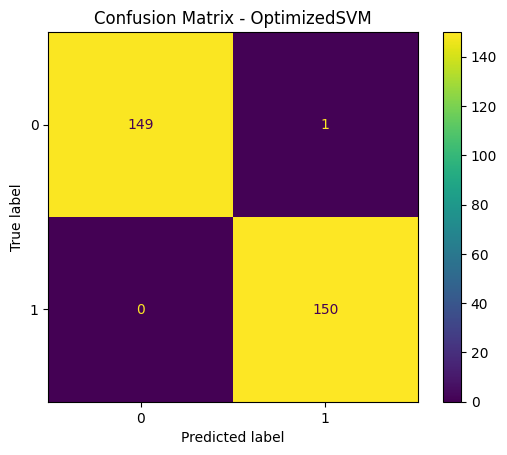

Metrics for ForestClassifier
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       150
           1       0.98      0.99      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



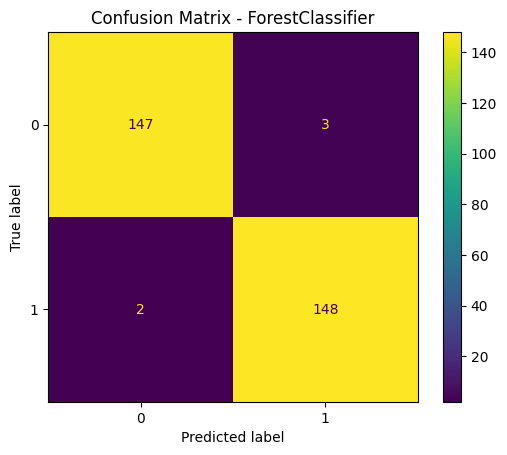

Metrics for NearestNeighbor
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       0.99      1.00      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



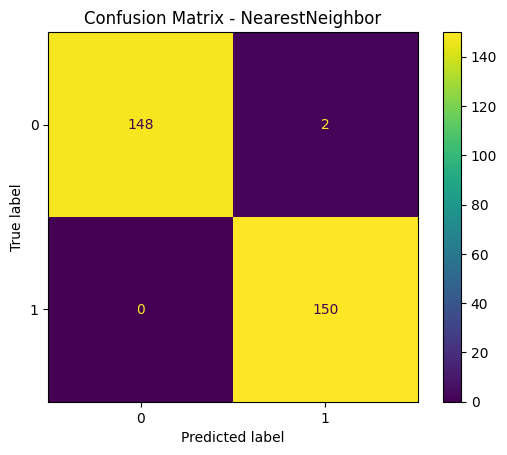

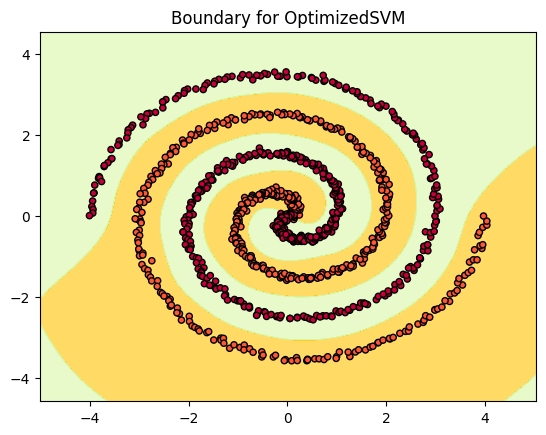

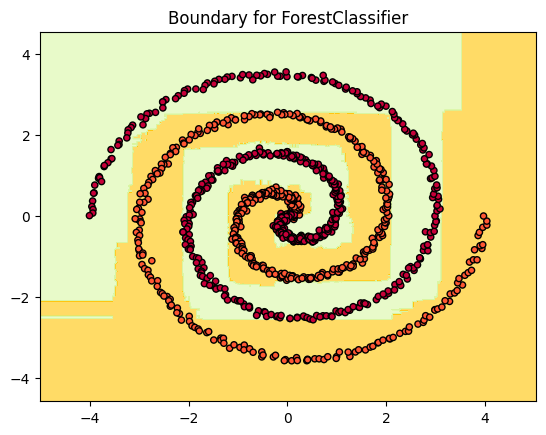

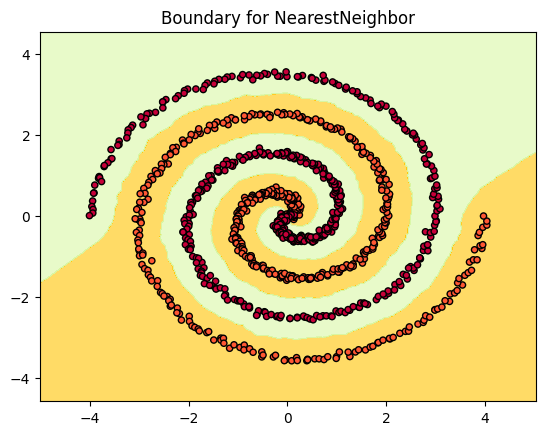

In [13]:
class SpiralClassifier:
    def __init__(self, data_path, test_size=0.3, random_state=42):
        self.data = pd.read_csv(data_path)
        self.features = self.data[['x', 'y']].to_numpy()
        self.labels = LabelEncoder().fit_transform(self.data['class'])
        self.test_size = test_size
        self.random_state = random_state
        self.train_features, self.test_features, self.train_labels, self.test_labels = self._split_data()
        self.models = self._initialize_models()

    def _split_data(self):
        return train_test_split(
            self.features, self.labels, test_size=self.test_size, random_state=self.random_state
        )

    def _optimize_svm(self):
        param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
        grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
        grid_search.fit(self.train_features, self.train_labels)
        return grid_search.best_params_

    def _initialize_models(self):
        best_params = self._optimize_svm()
        return {
            "OptimizedSVM": SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma']),
            "ForestClassifier": RandomForestClassifier(n_estimators=100, max_depth=10),
            "NearestNeighbor": KNeighborsClassifier(n_neighbors=5),
        }

    def evaluate_models(self):
        evaluation_results = {}
        for model_name, model_instance in self.models.items():
            model_instance.fit(self.train_features, self.train_labels)
            predictions = model_instance.predict(self.test_features)
            evaluation_results[model_name] = {
                "report": classification_report(self.test_labels, predictions, output_dict=True),
                "confusion_matrix": confusion_matrix(self.test_labels, predictions),
            }
            self._display_metrics(
                model_name,
                evaluation_results[model_name]["report"],
                evaluation_results[model_name]["confusion_matrix"],
            )
        return evaluation_results

    def _display_metrics(self, model_name, report, confusion_matrix):
        print(f"Metrics for {model_name}")
        print(classification_report(self.test_labels, self.models[model_name].predict(self.test_features)))
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.unique(self.labels)).plot()
        plt.title(f"Confusion Matrix - {model_name}")
        plt.show()

    def plot_decision_boundaries(self):
        for model_name, model_instance in self.models.items():
            self._plot_decision_boundary(model_instance, self.features, self.labels, f"Boundary for {model_name}")

    def _plot_decision_boundary(self, model, features, labels, title):
        bg_colors = ListedColormap(['#FFC300', '#DAF7A6'])
        point_colors = ListedColormap(['#FF5733', '#C70039'])
        x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
        y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
        )
        grid_predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
        grid_predictions = grid_predictions.reshape(xx.shape)
        plt.contourf(xx, yy, grid_predictions, cmap=bg_colors, alpha=0.6)
        plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=point_colors, edgecolor="k", s=20)
        plt.title(title)
        plt.show()

if __name__ == "__main__":
    spiral_classifier = SpiralClassifier(data_path="task4_spiral.csv")
    spiral_classifier.evaluate_models()
    spiral_classifier.plot_decision_boundaries()

**Аналіз результатів**:

1. Для класифікації даних із подвійною спіраллю було використано KNN, Random Forest та SVM із RBF-ядром.
2. Найвищу точність продемонстрували KNN та Random Forest із результатами 99% та 98% відповідно. SVM із RBF-ядром досяг результату 99%, однак для цього було потрібно оптимізувати параметри `C` та `gamma` за допомогою GridSearchCV, що дозволило моделі адаптуватися до складної структури даних.

Методи KNN і Random Forest є оптимальними для цього типу даних завдяки їхній гнучкості та незалежності від попереднього налаштування параметрів.

- **Random Forest** добре працює із нелінійними межами рішення завдяки своїй ансамблевій структурі, що дозволяє моделі враховувати складні взаємозв'язки між ознаками через побудову кількох дерев.

- **KNN** демонструє високу точність на нелінійних структурах, оскільки він базується на принципі локальної близькості та не вимагає припущень щодо форми меж класифікації. Це робить його ефективним для складних структур даних, таких як подвійна спіраль.

- **SVM** із RBF-ядром може показувати високі результати, але його продуктивність залежить від належного налаштування параметрів, таких як `C` та `gamma`. Без оптимізації цієї моделі може бути складніше адаптуватися до нелінійної природи даних.

Отже, KNN і Random Forest є менш вимогливими до попередніх налаштувань, що робить їх більш універсальними для цього типу задач.